In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-1million-tracks/spotify_data.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv ('/kaggle/input/spotify-1million-tracks/spotify_data.csv')

In [4]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   artist_name       1159749 non-null  object 
 1   track_name        1159763 non-null  object 
 2   track_id          1159764 non-null  object 
 3   popularity        1159764 non-null  int64  
 4   year              1159764 non-null  int64  
 5   genre             1159764 non-null  object 
 6   danceability      1159764 non-null  float64
 7   energy            1159764 non-null  float64
 8   key               1159764 non-null  int64  
 9   loudness          1159764 non-null  float64
 10  mode              1159764 non-null  int64  
 11  speechiness       1159764 non-null  float64
 12  acousticness      1159764 non-null  float64
 13  instrumentalness  1159764 non-null  float64
 14  liveness          1159764 non-null  float64
 15  valence           1159764 non-null  float64
 16  

In [6]:
df.describe().round(2)

,popularity,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00,1159764.00
mean,18.38,2011.96,0.54,0.64,5.29,-8.98,0.63,0.09,0.32,0.25,0.22,0.46,121.38,249561.78,3.89
std,15.89,6.80,0.18,0.27,3.56,5.68,0.48,0.13,0.35,0.37,0.20,0.27,29.78,149426.16,0.47
min,0.00,2000.00,0.00,0.00,0.00,-58.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2073.00,0.00
25%,5.00,2006.00,0.41,0.45,2.00,-10.83,0.00,0.04,0.01,0.00,0.10,0.23,98.80,181091.00,4.00
50%,15.00,2012.00,0.55,0.69,5.00,-7.45,1.00,0.05,0.15,0.00,0.13,0.44,121.93,225744.00,4.00
75%,29.00,2018.00,0.68,0.87,8.00,-5.28,1.00,0.09,0.64,0.61,0.29,0.67,139.90,286913.50,4.00
max,100.00,2023.00,0.99,1.00,11.00,6.17,1.00,0.97,1.00,1.00,1.00,1.00,249.99,6000495.00,5.00


In [7]:
df = df.loc[df['popularity'] != 0].drop_duplicates()
df.shape

(1001373, 19)

In [8]:
conditions = [
    (df.popularity <56.4),
    (df.popularity >= 56.4)
]

values = ['Unpopular', 'Popular']
df['popularity_class'] = np.select(conditions, values)

In [9]:
df.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,popularity_class
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,Popular
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,Unpopular
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,Popular
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,Popular
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,Unpopular


In [10]:
df.drop (columns = ['artist_name', 'track_id', 'track_name'], inplace = True)
df = pd.get_dummies (df, columns = ['genre'])
df.drop (columns = ['popularity'], inplace = True)
df = df.drop_duplicates()

In [11]:
class_dist = dict(Counter (df.popularity_class))

## **Preprocessing**
**Because the dataset is large (about 1 million rows), we decide to take a sample (10%) of it for predictive modelling.**

**However, the data is highly imbalanced, where examples with 'Popular' label only occupy about 2% of the dataset. Therefore, it will also cause the data imbalance in the training set, which is not desirable for a machine learning model. The sampling and train-test splitting is describe as follow:**

1. Randomly picking 10% of the original dataset as the sample data
2. Applying **standard scaling**, and **principal componenents analysis** on the sample data
3. Split the sample data into training and testing set, with the ratio of 4:1.
4. Re-sample the training set using **BorderlineSMOTE**


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [13]:
df_sample = df.sample (frac = 0.1)
X = np.array (df_sample.drop(columns = ['popularity_class']))
y = np.array (df_sample.popularity_class)

scaler = StandardScaler()
pca = PCA (n_components = 0.9)
x = scaler.fit_transform(X)
x = pca.fit_transform (x)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2, random_state = 10)

In [14]:
# #Training data resampling
# from imblearn.over_sampling import BorderlineSMOTE
# smote = BorderlineSMOTE(random_state=42)
# x_train, y_train = smote.fit_resample(x_train, y_train)

In [15]:
# from imblearn.over_sampling import ADASYN

# adasyn = ADASYN(random_state=42)
# x_train, y_train = adasyn.fit_resample(x_train, y_train)

In [14]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
x_train, y_train = smote_enn.fit_resample(x_train, y_train)


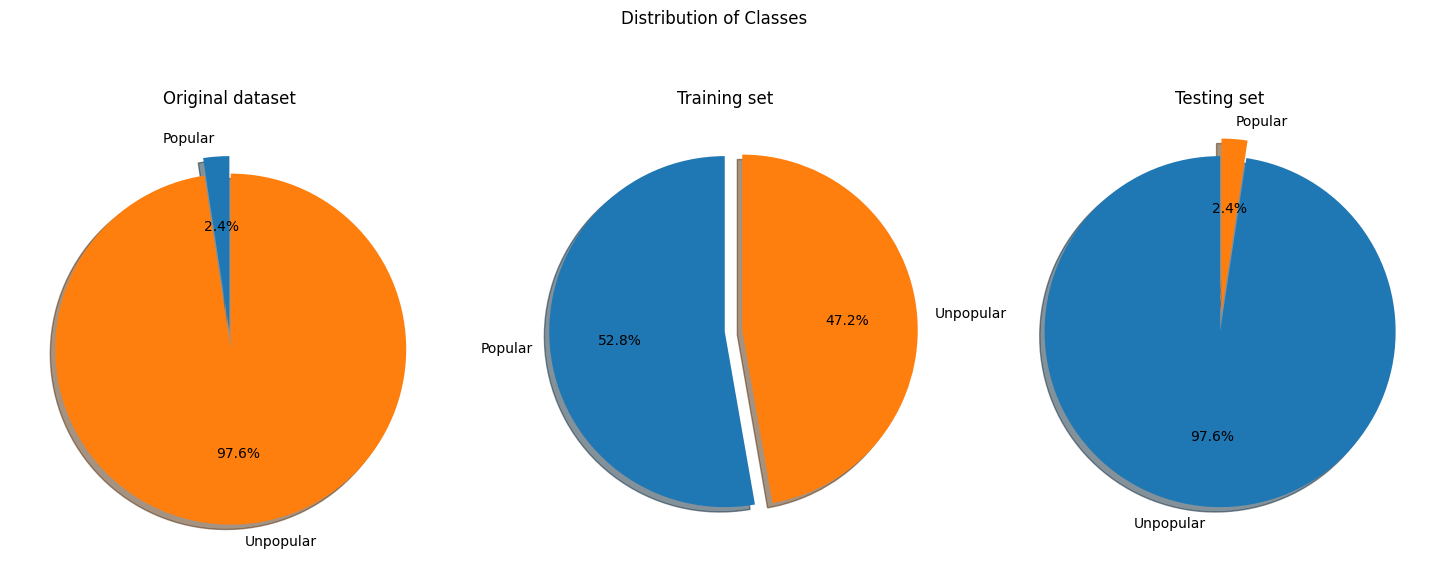

In [15]:
#Plotting classes distribution 
ori_dist = dict (Counter (df.popularity_class))
train_dist = dict(Counter (y_train))
test_dist = dict (Counter (y_test))
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
fig.suptitle ('Distribution of Classes', y=0.71)
fig.tight_layout (pad = 1)
ax[0].pie(ori_dist.values(), explode = explode, labels = ori_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[0].set_title ('Original dataset')
ax[1].pie(train_dist.values(), explode=explode, labels=train_dist.keys(), autopct = '%1.1f%%', shadow = True, startangle = 90)
ax[1].set_title ('Training set')
ax[2].pie(test_dist.values(), explode=explode, labels=test_dist.keys(), autopct='%1.1f%%',shadow=True, startangle=90)
ax[2].set_title ('Testing set')

plt.show()

## **Predictive Modelling**

In [16]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report # Reporting metric
from sklearn.metrics import confusion_matrix # classifies predicted values as TP, TN, FP, FN
from sklearn.metrics import accuracy_score # calculates accuracy

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [17]:
classification_models = [
    ('Logistic Regression', LogisticRegression(solver='lbfgs')),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('Linear Discriminant Analysis', LinearDiscriminantAnalysis()),
    ('Gaussian NB', GaussianNB()),
    ('RandomForestClassifier', RandomForestClassifier())
]

In [18]:
classification_ac_score = dict()
for (name, model) in classification_models:
    model_ = model
    kfold = StratifiedKFold (n_splits = 3, random_state = 3, shuffle = True)
    model_results = cross_val_score (model, x_train, y_train, cv = kfold, scoring = 'accuracy')
    classification_ac_score[f'{name}'] = model_results.mean()
    print (name, model_results.mean().round (2))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression 0.88
Decision Tree Classifier 0.97
KNeighborsClassifier 0.98
Linear Discriminant Analysis 0.86
Gaussian NB 0.72
RandomForestClassifier 0.99


**

In [19]:
y_true = y_test.copy()
y_train_ = y_train.copy()

In [20]:
y_true = np.array(list(map(lambda x: 1 if x == 'Popular' else 0, y_true)))
y_train_ = np.array (list(map(lambda x:1 if x == 'Popular' else 0, y_train_)))



/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

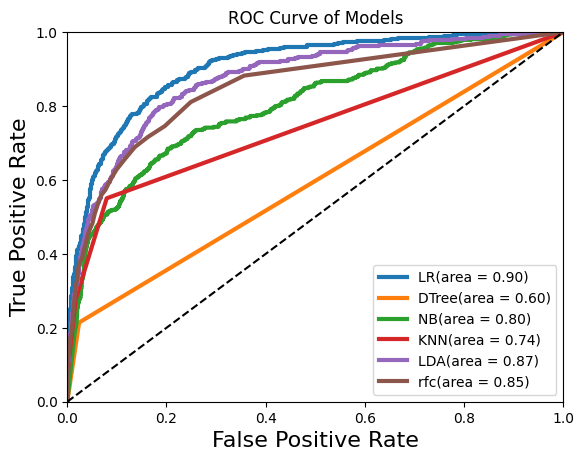

<Figure size 1000x600 with 0 Axes>

In [21]:
#import functions
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train,y_train_)
y_score_lr = cross_val_predict(lr, x_test, y_true, method='decision_function',cv=3)
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_true,y_score_lr)

#RandomForest Classifier
rfc = RandomForestClassifier()
rfc.fit (x_train, y_train_)
y_score_rfc = cross_val_predict (rfc, x_test, y_true, method = 'predict_proba', cv =3)
fpr_rfc, tpr_rfc, threshold_rfc = roc_curve (y_true, y_score_rfc[:, 1])

# Decision Tree Classifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train_)
y_score_tree = cross_val_predict(tree, x_test, y_true, method = 'predict_proba', cv = 3)
fpr_tree, tpr_tree, threshold_tree = roc_curve (y_true, y_score_tree[:, 1])

# GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train_)
y_score_gnb = cross_val_predict(gnb,x_test, y_true,method='predict_proba',cv=3)
fpr_gnb, tpr_gnb, threshold_gnb = roc_curve(y_true,y_score_gnb[:,1])

# K Neighbor Classifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train_)
y_score_knn = cross_val_predict(knc,x_test, y_true,method='predict_proba',cv=3)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_true,y_score_knn[:,1])

# LDA
lda = LinearDiscriminantAnalysis()
lda.fit(x_train,y_train_)
y_score_lda = cross_val_predict(lda,x_test, y_true,method='predict_proba',cv=3)
fpr_lda, tpr_lda, threshold_lda = roc_curve(y_true,y_score_lda[:,1])



# ROC Curve for the models above
plt.plot(fpr_lr, tpr_lr, linewidth = 3, label='LR(area = %0.2f)' % roc_auc_score(y_true,y_score_lr))
plt.plot(fpr_tree, tpr_tree, linewidth = 3, label = 'DTree(area = %0.2f)' %roc_auc_score (y_true, y_score_tree[:, 1]))
plt.plot(fpr_gnb, tpr_gnb, linewidth = 3, label='NB(area = %0.2f)' % roc_auc_score(y_true,y_score_gnb[:,1]))
plt.plot(fpr_knn, tpr_knn, linewidth = 3, label='KNN(area = %0.2f)' % roc_auc_score(y_true,y_score_knn[:,1]))
plt.plot(fpr_lda, tpr_lda, linewidth = 3, label='LDA(area = %0.2f)' % roc_auc_score(y_true,y_score_lda[:,1]))
plt.plot(fpr_rfc, tpr_rfc, linewidth = 3, label='rfc(area = %0.2f)' %roc_auc_score (y_true, y_score_rfc[:,1]))


plt.legend()
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC Curve of Models')
plt.figure(figsize=(10, 6))
plt.show()

The ROC curve

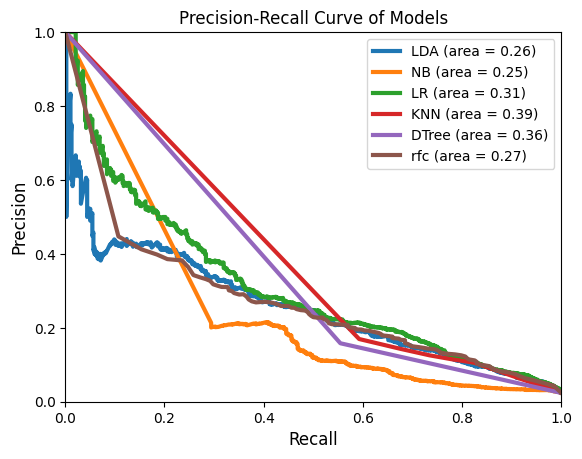

<Figure size 1500x1500 with 0 Axes>

In [22]:
# import functions
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, roc_curve, auc, f1_score, fbeta_score

#LDA
lda_precision, lda_recall, threshold = precision_recall_curve(y_true, lda.predict_proba(x_test)[:,1])
#lda_fbeta = fbeta_score(y_true,lda.predict(x_test), beta = 2)
lda_roc_auc = auc(lda_recall, lda_precision)

#DecisionTree
tree_precision, tree_recall, threshold = precision_recall_curve (y_true, tree.predict_proba(x_test)[:, 1])
#tree_fbeta = fbeta_score (y_true, tree.predict(x_test), beta = 2)
tree_roc_auc = auc (tree_recall, tree_precision)

#RandomForestClassifier
rfc_precision, rfc_recall, threshold = precision_recall_curve (y_true, rfc.predict_proba (x_test)[:, 1])
#rfc_fbeta = fbeta_score (y_true, rfc.predict(x_test), beta = 2)
rfc_roc_auc = auc (rfc_recall, rfc_precision)

#NB
gnb_precision, gnb_recall, threshold = precision_recall_curve(y_true, gnb.predict_proba(x_test)[:,1])
#gnb_fbeta = fbeta_score(y_true,gnb.predict(x_test), beta = 2)
gnb_roc_auc = auc(gnb_recall, gnb_precision)

#LR
lr_precision, lr_recall, threshold = precision_recall_curve(y_true, lr.predict_proba(x_test)[:,1])
#lr_fbeta = fbeta_score(y_true,lr.predict(x_test), beta =2)
lr_roc_auc = auc(lr_recall, lr_precision)

#KNN
knc_precision, knc_recall, threshold = precision_recall_curve(y_true, knc.predict_proba(x_test)[:,1])
#knc_fbeta = fbeta_score(y_true,knc.predict(x_test), beta = 2)
knc_roc_auc = auc(knc_recall, knc_precision)


# Precision - Recall Curve for the models above
plt.plot(lda_recall, lda_precision, linewidth = 3,label = 'LDA (area = %0.2f)' % lda_roc_auc)
plt.plot(gnb_recall, gnb_precision, linewidth = 3,label = 'NB (area = %0.2f)' % gnb_roc_auc)
plt.plot(lr_recall, lr_precision, linewidth = 3,label = 'LR (area = %0.2f)' % lr_roc_auc)
plt.plot(knc_recall, knc_precision, linewidth = 3,label = 'KNN (area = %0.2f)' % knc_roc_auc)
plt.plot(tree_recall, tree_precision, linewidth = 3, label = 'DTree (area = %0.2f)' % tree_roc_auc)
plt.plot(rfc_recall, rfc_precision, linewidth = 3, label = 'rfc (area = %0.2f)' %rfc_roc_auc)


plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall',fontsize = 12)
plt.ylabel('Precision',fontsize = 12)
plt.title('Precision-Recall Curve of Models')
plt.legend(loc = "upper right")
plt.figure(figsize = (15,15))
plt.show()

<BarContainer object of 6 artists>

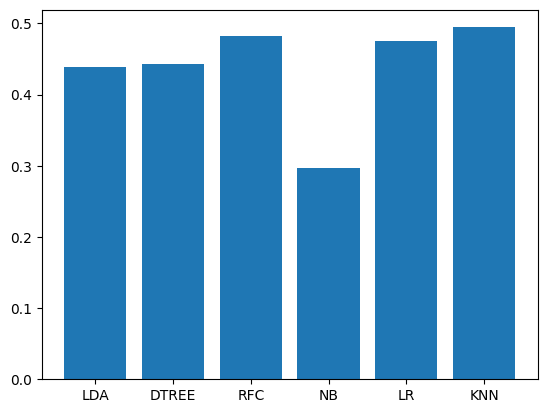

In [23]:
lda_fbeta = fbeta_score(y_true,lda.predict(x_test), beta = 3)
tree_fbeta = fbeta_score (y_true, tree.predict(x_test), beta = 3)
rfc_fbeta = fbeta_score (y_true, rfc.predict(x_test), beta = 3)
gnb_fbeta = fbeta_score(y_true,gnb.predict(x_test), beta =3)
lr_fbeta = fbeta_score(y_true,lr.predict(x_test), beta =3)
knc_fbeta = fbeta_score(y_true,knc.predict(x_test), beta = 3)

names = ['LDA', 'DTREE', 'RFC', 'NB', 'LR', 'KNN']
values = [lda_fbeta, tree_fbeta, rfc_fbeta, gnb_fbeta, lr_fbeta, knc_fbeta]
plt.bar (names, values)

In [24]:
def gen_metric (model):
    model_ = model.fit (x_train, y_train)
    y_pred = model_.predict (x_test)
    cm = confusion_matrix (y_test, y_pred)
    
    print (classification_report (y_test, y_pred))
    
    fig, ax = plt.subplots (figsize = (6, 3))
    sns.heatmap (cm, annot = True, ax = ax, linewidths =0.5, cmap = 'Blues', fmt = 'g')
    ax.set_xticklabels (['Popular', 'Unpopular'])
    ax.set_yticklabels (['Popular', 'Unpopular'])
    ax.set_xlabel ('Prediction')
    ax.set_ylabel ('Actual labels')
    ax.set_title ('Confusion Matrix')
    plt.plot()

For the given problem, False Positive is more significant than False Negative -> **The higher Recall value, the better the model**

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

     Popular       0.10      0.85      0.17       476
   Unpopular       1.00      0.81      0.89     19504

    accuracy                           0.81     19980
   macro avg       0.55      0.83      0.53     19980
weighted avg       0.97      0.81      0.87     19980



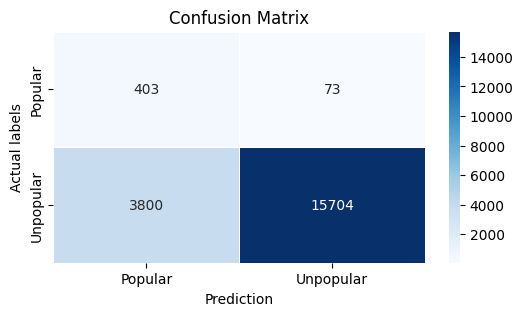

In [25]:
gen_metric (LogisticRegression())

              precision    recall  f1-score   support

     Popular       0.08      0.87      0.15       476
   Unpopular       1.00      0.75      0.86     19504

    accuracy                           0.76     19980
   macro avg       0.54      0.81      0.50     19980
weighted avg       0.97      0.76      0.84     19980



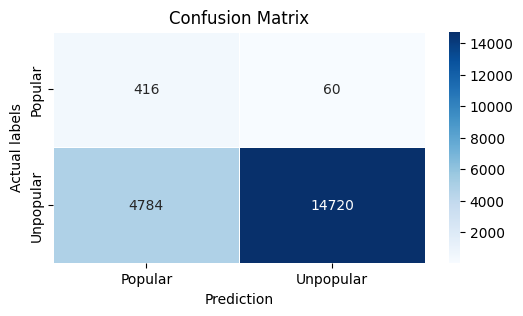

In [26]:
gen_metric (LinearDiscriminantAnalysis())

              precision    recall  f1-score   support

     Popular       0.15      0.54      0.24       476
   Unpopular       0.99      0.93      0.96     19504

    accuracy                           0.92     19980
   macro avg       0.57      0.73      0.60     19980
weighted avg       0.97      0.92      0.94     19980



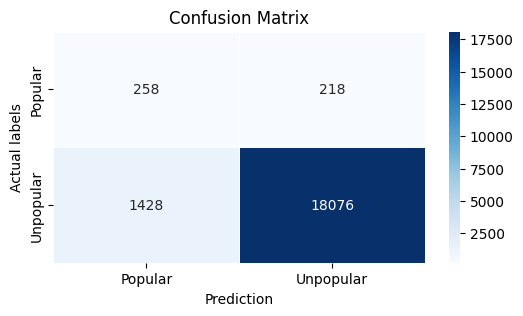

In [27]:
gen_metric (DecisionTreeClassifier())

              precision    recall  f1-score   support

     Popular       0.13      0.74      0.21       476
   Unpopular       0.99      0.87      0.93     19504

    accuracy                           0.87     19980
   macro avg       0.56      0.80      0.57     19980
weighted avg       0.97      0.87      0.91     19980



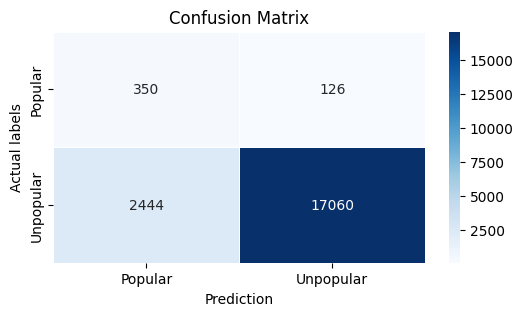

In [28]:
gen_metric (KNeighborsClassifier())

              precision    recall  f1-score   support

     Popular       0.04      0.79      0.08       476
   Unpopular       0.99      0.59      0.74     19504

    accuracy                           0.59     19980
   macro avg       0.52      0.69      0.41     19980
weighted avg       0.97      0.59      0.72     19980



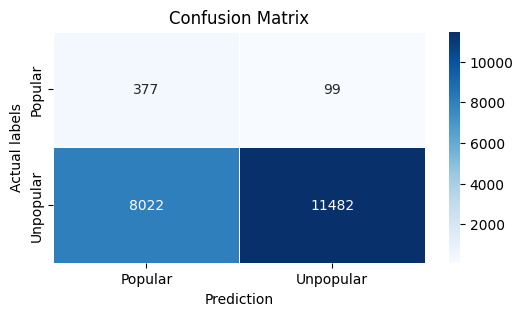

In [29]:
gen_metric (GaussianNB())

              precision    recall  f1-score   support

     Popular       0.20      0.59      0.30       476
   Unpopular       0.99      0.94      0.97     19504

    accuracy                           0.94     19980
   macro avg       0.60      0.77      0.63     19980
weighted avg       0.97      0.94      0.95     19980



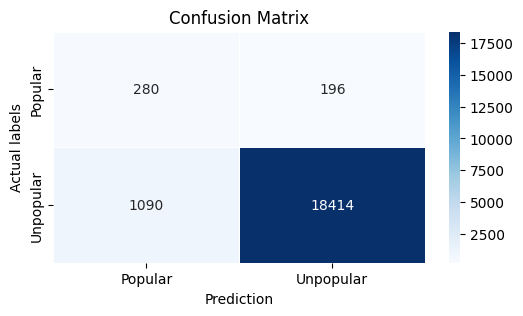

In [30]:
gen_metric (RandomForestClassifier(n_estimators=100,random_state=42))